In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of individuals
n = 1000

# Generate demographic data
data = pd.DataFrame({
    'age': np.random.randint(20, 81, n),
    'gender': np.random.choice(['Male', 'Female'], n),
    'smoker': np.random.choice([0, 1], n, p=[0.7, 0.3]),  # 30% smokers
    'exercise_level': np.random.choice(['Low', 'Moderate', 'High'], n, p=[0.5, 0.3, 0.2])
})

# Generate biomarker data
data['systolic_bp'] = np.random.normal(120, 15, n).clip(90, 200)
data['diastolic_bp'] = np.random.normal(80, 10, n).clip(60, 120)
data['total_cholesterol'] = np.random.normal(200, 30, n).clip(125, 300)
data['hdl'] = np.random.normal(50, 10, n).clip(30, 80)
data['ldl'] = np.random.normal(120, 30, n).clip(80, 190)
data['fasting_glucose'] = np.random.normal(100, 15, n).clip(70, 150)

# Heart disease risk (target)
data['heart_disease'] = (data['age'] > 50).astype(int)  # Simplified rule
data['heart_disease'] |= (data['systolic_bp'] > 140).astype(int)
data['heart_disease'] |= (data['total_cholesterol'] > 240).astype(int)
data['heart_disease'] = data['heart_disease'].apply(lambda x: 1 if x > 0 else 0)

data.head()

,age,gender,smoker,exercise_level,systolic_bp,diastolic_bp,total_cholesterol,hdl,ldl,fasting_glucose,heart_disease
0,58,Male,0,Low,112.393866,81.848679,172.919010,31.612233,157.713083,121.751306,1
1,71,Female,0,Low,94.973227,93.907325,228.407854,41.852818,130.108030,80.946522,1
2,48,Female,1,Low,100.075276,81.239174,158.085431,60.719654,81.993099,86.854094,0
3,34,Male,0,Low,121.162106,72.082906,236.661958,42.819612,133.160039,110.205139,0
4,62,Male,0,Low,142.703970,77.957047,209.626295,48.885092,171.046982,104.056122,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int32  
 1   gender             1000 non-null   object 
 2   smoker             1000 non-null   int32  
 3   exercise_level     1000 non-null   object 
 4   systolic_bp        1000 non-null   float64
 5   diastolic_bp       1000 non-null   float64
 6   total_cholesterol  1000 non-null   float64
 7   hdl                1000 non-null   float64
 8   ldl                1000 non-null   float64
 9   fasting_glucose    1000 non-null   float64
 10  heart_disease      1000 non-null   int64  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 78.3+ KB


In [5]:
data['exercise_level'].unique()

array(['Low', 'High', 'Moderate'], dtype=object)

In [7]:
#binning the exercise_level and gender column to convert it to int
data['exercise_level_bin'] = data['exercise_level'].map({'Low': 1, 'Moderate': 2, 'High': 3})
data['gender_bin'] = data['gender'].map({'Male': 0, 'Female': 1})
data.head()

,age,gender,smoker,exercise_level,systolic_bp,diastolic_bp,total_cholesterol,hdl,ldl,fasting_glucose,heart_disease,exercise_level_bin,gender_bin
0,58,Male,0,Low,112.393866,81.848679,172.919010,31.612233,157.713083,121.751306,1,1,0
1,71,Female,0,Low,94.973227,93.907325,228.407854,41.852818,130.108030,80.946522,1,1,1
2,48,Female,1,Low,100.075276,81.239174,158.085431,60.719654,81.993099,86.854094,0,1,1
3,34,Male,0,Low,121.162106,72.082906,236.661958,42.819612,133.160039,110.205139,0,1,0
4,62,Male,0,Low,142.703970,77.957047,209.626295,48.885092,171.046982,104.056122,1,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int32  
 1   gender              1000 non-null   object 
 2   smoker              1000 non-null   int32  
 3   exercise_level      1000 non-null   object 
 4   systolic_bp         1000 non-null   float64
 5   diastolic_bp        1000 non-null   float64
 6   total_cholesterol   1000 non-null   float64
 7   hdl                 1000 non-null   float64
 8   ldl                 1000 non-null   float64
 9   fasting_glucose     1000 non-null   float64
 10  heart_disease       1000 non-null   int64  
 11  exercise_level_bin  1000 non-null   int64  
 12  gender_bin          1000 non-null   int64  
dtypes: float64(6), int32(2), int64(3), object(2)
memory usage: 93.9+ KB


In [11]:
data = data.drop(['exercise_level', 'gender'], axis=1)
data.head()

,age,smoker,systolic_bp,diastolic_bp,total_cholesterol,hdl,ldl,fasting_glucose,heart_disease,exercise_level_bin,gender_bin
0,58,0,112.393866,81.848679,172.919010,31.612233,157.713083,121.751306,1,1,0
1,71,0,94.973227,93.907325,228.407854,41.852818,130.108030,80.946522,1,1,1
2,48,1,100.075276,81.239174,158.085431,60.719654,81.993099,86.854094,0,1,1
3,34,0,121.162106,72.082906,236.661958,42.819612,133.160039,110.205139,0,1,0
4,62,0,142.703970,77.957047,209.626295,48.885092,171.046982,104.056122,1,1,0


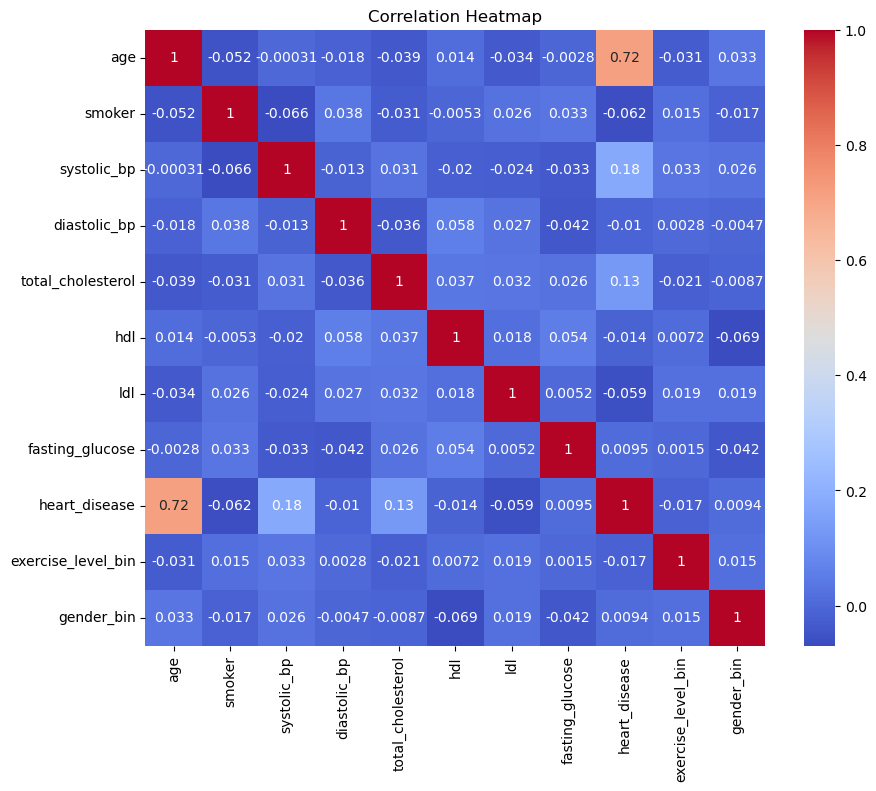

In [13]:
#Using an heatmap to check for correlation between each feature
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
data['systolic_bp'] = data['systolic_bp'].astype(int)
data['diastolic_bp'] = data['diastolic_bp'].astype(int)
data['total_cholesterol'] = data['total_cholesterol'].astype(int)
data['hdl'] = data['hdl'].astype(int)
data['ldl'] = data['ldl'].astype(int)
data['fasting_glucose'] = data['fasting_glucose'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 1000 non-null   int32
 1   smoker              1000 non-null   int32
 2   systolic_bp         1000 non-null   int32
 3   diastolic_bp        1000 non-null   int32
 4   total_cholesterol   1000 non-null   int32
 5   hdl                 1000 non-null   int32
 6   ldl                 1000 non-null   int32
 7   fasting_glucose     1000 non-null   int32
 8   heart_disease       1000 non-null   int64
 9   exercise_level_bin  1000 non-null   int64
 10  gender_bin          1000 non-null   int64
dtypes: int32(8), int64(3)
memory usage: 54.8 KB


In [17]:
#begining building my model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Import from sklearn.ensemble
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [19]:
x = data.drop('heart_disease', axis=1)
y = data['heart_disease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#fitting the model and running predictions
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [25]:
#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 79   0]
 [  0 121]]
ROC AUC Score: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

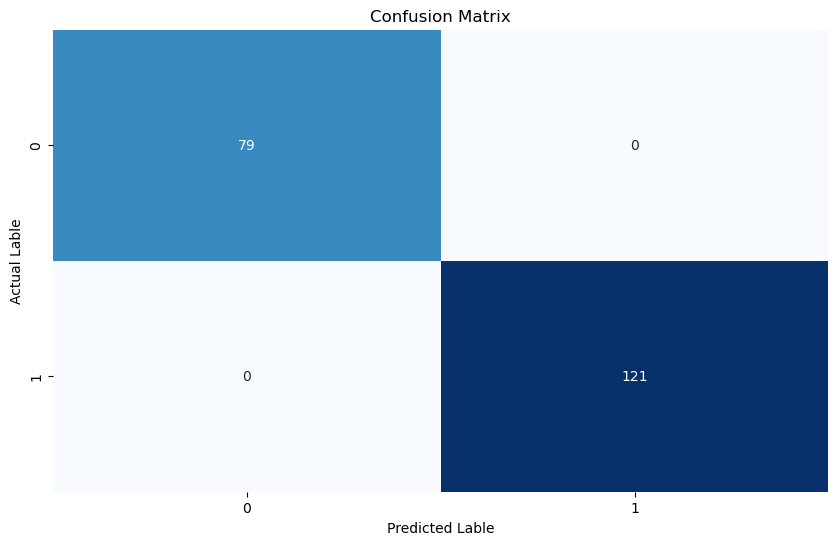

In [31]:
#visualizating my confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Lable')
plt.ylabel('Actual Lable')
plt.title('Confusion Matrix')
plt.show

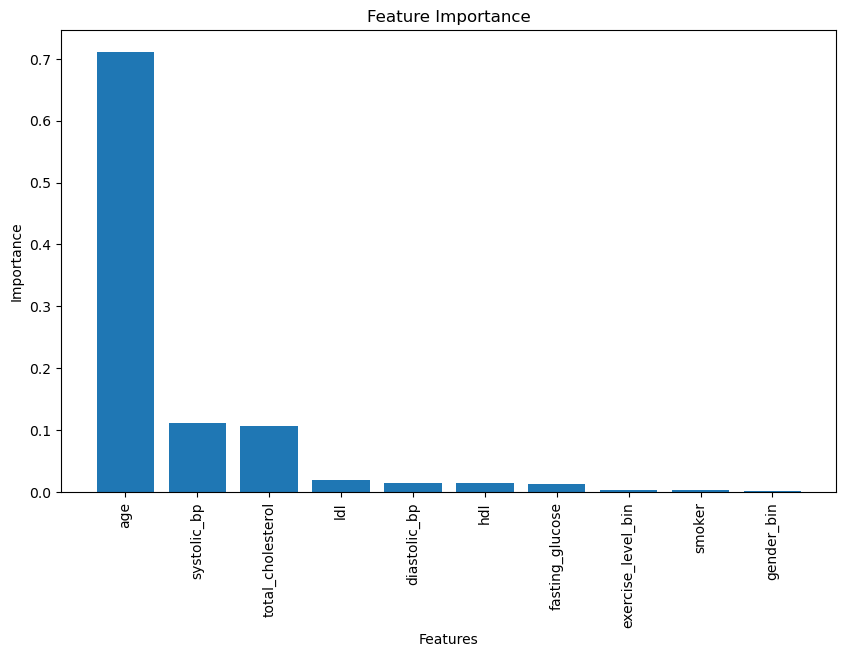

In [29]:
feature_importances = rf.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()